## <font color=blue> Calculus Extreme Values using Python and SymPy



### <font color=blue> Problem 
<font color=blue> Find the absolute extrema for the specified function (expression) over a given the interval.

<font color=blue> For example:
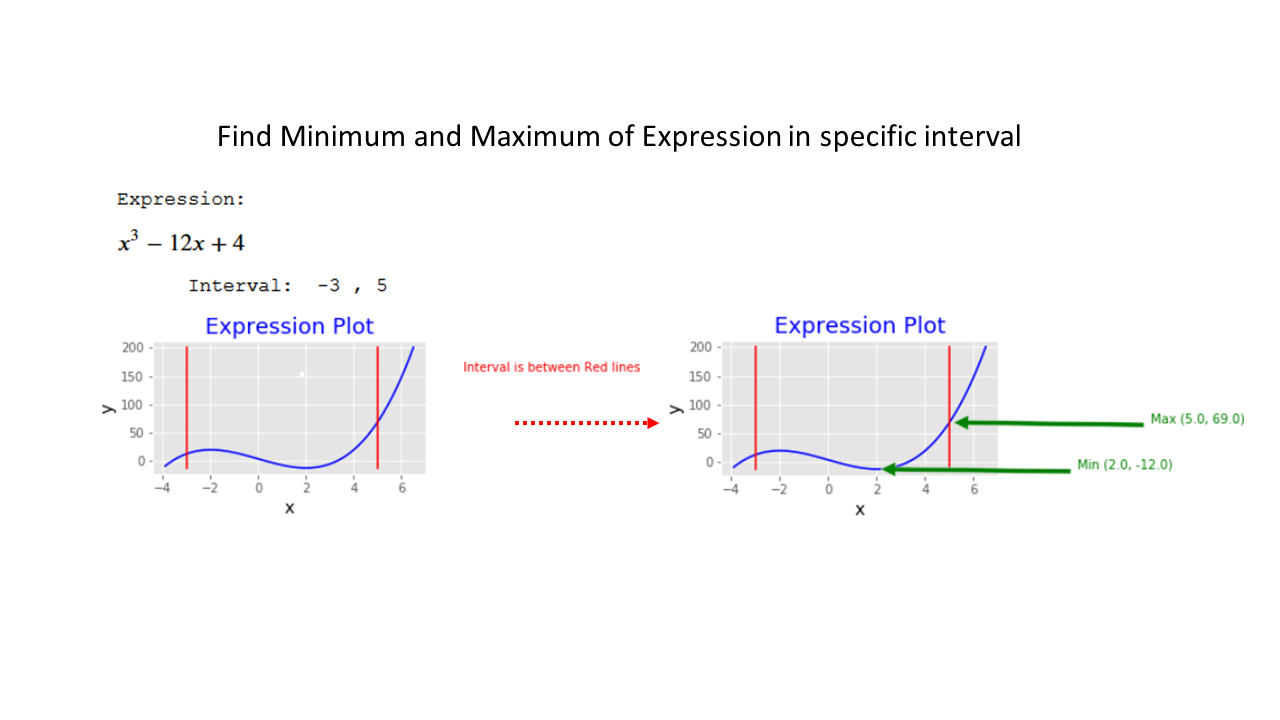
    



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### <font color=blue> Key Inputs: expression and interval for evaluation</font>

In [2]:
from sympy import pprint, init_printing
from sympy import *
init_printing(use_unicode=True)
from sympy import Symbol, Eq,  solveset, S
import math

x= Symbol('x', real=True)                                # define x as a symbol

In [3]:
expr = x**3 -12 * x +4                    # test case exression; x_min = -3  x_max = 5
x_min = -3                                  # specify interval (min)
x_max = 5                                  # specify interval (max)
print("Expression:")
display(expr)
print( "Interval: ", x_min,',', x_max)

Expression:


Interval:  -3 , 5


### <font color=blue> Plot the expression for visualization </font>

Expression:


Interval:  -3 , 5


<function matplotlib.pyplot.show(*args, **kw)>

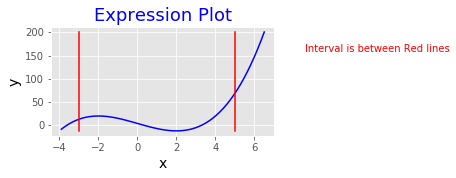

In [4]:
# Plot the function to understand the function and data
print("Expression:")
display(expr)
print( "Interval: ", x_min,',', x_max)

# Create data for plot of function
x_expr = [x for x in np.linspace(start = x_min -.3*abs(x_min), stop = (x_max+.3*abs(x_max)), num = 60)]

y_expr = []
for x_data in x_expr:
    y = expr.subs([(x, x_data)])            # Substitution, uses value of x_data for x in expression
    y_expr.append(y)
x_min_line = [x_min, x_min]
x_max_line = [x_max,x_max]
y_limit_line = [min(y_expr),max(y_expr)]

# Plot data    
plt.figure(figsize=(4,2))                       # resets to new figure   
plt.style.use('ggplot')
plt.xlabel('x', fontsize = 14, color='black')
plt.ylabel('y', fontsize = 14, color='black')
plt.title("Expression Plot", loc='center', fontsize=18, color='b')
plt.plot(x_expr,y_expr, color='b')
plt.plot([x_min,x_min],[min(y_expr),max(y_expr)], color='r')   # limit line at min
plt.plot([x_max,x_max],[min(y_expr),max(y_expr)], color='r')   # limit line at max
#plt.annotate("Interval between Red lines", eval_list[0],textcoords="offset points",xytext=(100,0),color='r')
plt.annotate("Interval is between Red lines", [x_max,max(y_expr)],textcoords="offset points",xytext=(70,-20),color='r')
plt.show

###  <font color=blue> Take a derivative of f(x), the 1st derivative (slope), with respect to x and plot derivative:

In [5]:
from sympy import Derivative
print("Expression:")
display(expr)

deriv1= Derivative(expr, x)                   # take derivative
print('Derivative:' )
display(deriv1.doit())

value_der = deriv1.doit().subs({x:4})             # derivative at x = 4
value_expr = expr.subs([(x, 4)])              # function at x = 4
print('At x = 4, the Value of function is {} and Value of deriviative is {} '.format(value_expr,value_der))
value_der = deriv1.doit().subs({x:0})             # derivative at x = 4
value_expr = expr.subs([(x, 0)])              # function at x = 4
print('At x = 0, the Value of function is {} and Value of deriviative is {} '.format(value_expr,value_der))

Expression:


Derivative:


At x = 4, the Value of function is 20 and Value of deriviative is 36 
At x = 0, the Value of function is 4 and Value of deriviative is -12 


###  <font color=blue> Plot 1st derivative on same chart as expression for visulization

In [6]:
# Create the derivative plot data (function data already done)
x_der = [x for x in np.linspace(start = x_min, stop = x_max, num = 60)]
y_der = []
for x_data in x_der:
    y = deriv1.doit().subs({x:x_data})             # derivative at x = ....
    y_der.append(y)

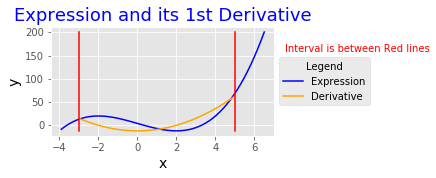

In [7]:
plt.figure(figsize=(4,2))                       # resets to new figure
plt.title('Expression and its 1st Derivative', loc='center', fontsize=18, color='b')
line_chart1 = plt.plot(x_expr, y_expr, color = 'blue')
line_chart2 = plt.plot(x_der, y_der, color = 'orange')
plt.xlabel('x', fontsize = 14, color='black')
plt.ylabel('y', fontsize = 14, color='black')
plt.legend(['Expression', 'Derivative'], loc='center left', bbox_to_anchor=(1.0, 0.5), title='Legend')
plt.plot([x_min,x_min],[min(y_expr),max(y_expr)], color='r')   # limit line at min
plt.plot([x_max,x_max],[min(y_expr),max(y_expr)], color='r')   # limit line at max
plt.annotate("Interval is between Red lines", [x_max,max(y_expr)],textcoords="offset points",xytext=(50,-20),color='r')
plt.show()

### <font color=blue> Find Critical Values; where 1st derivative (slope) = 0

In [8]:
# Set the (first) derivative equal to zero. Solve for x. Call these values x_cv.
eq1 = Eq(deriv1.doit()) 
print(eq1)
x_cv_temp = solve(eq1,x)               # solve for critical values (get values of x when y = 0)

print('Results of solve:', x_cv_temp)
x_cv = []
for item in x_cv_temp:            # only include those within the interval
    if   x_min <= item <= x_max:
        x_cv.append(item)
print('{} Critcal Values: {} '.format(len(x_cv),x_cv))

# determine if there are > 2 values (--> multiple min or max)
note = ''
if type(solveset(eq1,x)) == Union: note = 'Note: Solution contains multiple min or max values. '

Eq(3*x**2 - 12, 0)
Results of solve: [-2, 2]
2 Critcal Values: [-2, 2] 


### <font color=blue> Evaluate Expression at the Critical Values (slope = 0) and at Endpoints (interval endpoints that don't have a slope). 
    From this, determine max and min values of 'y' where slope (at x = _) is zero or endpoint.  Note that could be multiple points where max and min occurs (e.g. sine curve). 

In [9]:
print('Expression:      ', expr)
print('Critcal Values:  ',x_cv)
eval_list = []            # will include (x,y) tuples for critical values and endpoints
for x_data in x_cv:
    y = expr.subs([(x, x_data)])            # Substitution, uses value of x_data for x in expression to calc y
    eval_list.append((x_data,y))               # include value of x and y as a tuple
eval_list.append((x_min, expr.subs([(x, x_min)])))            # get y at interval lower endpoint
eval_list.append((x_max, expr.subs([(x, x_max)])))            # get y at interval upper endpoint

print('\nEval List:')

# Occassionally, this will produce something like: 1/(4*(sqrt(42)/4 + 13/8)**(1/3)) + 1/2 + (sqrt(42)/4 + 13/8)**(1/3)
# To correct, convert to float
for i in range(len(eval_list)):                # make sure all are floats
    xtemp = float(eval_list[i][0])
    ytemp = float(eval_list[i][1])
    xtemp = float('{:.2g}'.format(xtemp))      # convert to 2 significant figures
    ytemp = float('{:.2g}'.format(ytemp))
    eval_list[i]= (xtemp,ytemp)
    print('    item', i, eval_list[i])
    
eval_list.sort(key=lambda tup: tup[1])                        # sorts in place by 2nd value (y value)
    
print('\nFinal Answer on extreme values (x,y):')
print('    x,y Min: ', eval_list[0])
print('    x,y Max: ', eval_list[-1])

Expression:       x**3 - 12*x + 4
Critcal Values:   [-2, 2]

Eval List:
    item 0 (-2.0, 20.0)
    item 1 (2.0, -12.0)
    item 2 (-3.0, 13.0)
    item 3 (5.0, 69.0)

Final Answer on extreme values (x,y):
    x,y Min:  (2.0, -12.0)
    x,y Max:  (5.0, 69.0)


### <font color=blue> Plot data along with annotation of min and max points

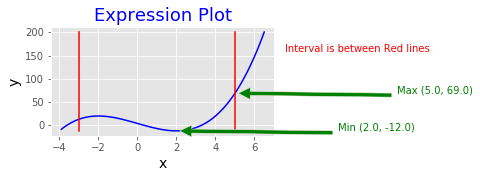

In [10]:
# Plot data along with annotation of min and max points
min_note= 'Min ' + str(eval_list[0])
max_note= 'Max ' + str(eval_list[-1])

fig, ax = plt.subplots(figsize=(4, 2))
plt.style.use('ggplot')
plt.xlabel('x', fontsize = 14, color='black')
plt.ylabel('y', fontsize = 14, color='black')
plt.annotate(max_note, eval_list[-1], ha='center',textcoords="offset points",xytext=(200,0),color='g',
            arrowprops=dict(facecolor='g', shrink=0.02)) 
plt.annotate(min_note, eval_list[0],textcoords="offset points",xytext=(200,0), ha='center', color='g',
             arrowprops=dict(facecolor='g', shrink=0.02))
plt.title("Expression Plot", loc='center', fontsize=18, color='b')
plt.plot(x_expr,y_expr, color='b')
plt.plot([x_min,x_min],[min(y_expr),max(y_expr)], color='r')   # limit line at min
plt.plot([x_max,x_max],[min(y_expr),max(y_expr)], color='r')   # limit line at max
plt.annotate("Interval is between Red lines", [x_max,max(y_expr)],textcoords="offset points",xytext=(50,-20),color='r')
plt.show()
print( note)

### Additional Problems

In [11]:
expr = x**3 -12 * x +4                    # test case exression; x_min = -3  x_max = 5
expr= x**4 - 2*x**3 - 12*x + 4            # specify the expression; x_min = -3   x_max = 5 
expr= 2*x**4 - 8*x**3                     # specify the expression; x_min = 2   x_max = 4
expr= 4/x**6  - 3/x**8                    # specify the expression; x_min = .5  x_max = 10
expr= sin(x) +40                          # specify the expression; x_min = -3   x_max = 20 
expr = 2*x**3 +3*x**2 -12*x               # specify the expression; x_min = -20 x_max =20
expr = 3*x**4 -16*x**3 +24*x**2               # specify the expression; x_min = -20 x_max =20
expr = x**2/16                            # parabola, x_min = -4 x_max = 4